In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
free_ds = xr.open_dataset('/glade/u/home/mollyw/work/Projects/cice-scm-da/data/processed/FREE/free_ens.nc')

In [3]:
def calculate_error_bounds(ds):
    
    pem = ds.mean(dim = 'ensemble_member')
    psd = ds.std(dim = 'ensemble_member', ddof=1)
    
    upperbound = pem + psd
    upperbound['aice'] = upperbound.aice.where(upperbound.aice < 1, 1)
    lowerbound = pem - psd 
    
    return upperbound, lowerbound, pem

In [4]:
fup, flw, fem = calculate_error_bounds(free_ds)

/glade/scratch/mollyw/ipykernel_280649/3972448746.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][0].set_xticklabels(labels = ['Jan','Mar','May','Jul','Sep','Nov','Jan'], rotation=35, fontsize=12)
/glade/scratch/mollyw/ipykernel_280649/3972448746.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][1].set_xticklabels(labels = ['Jan','Mar','May','Jul','Sep','Nov','Jan'], rotation=35, fontsize=12)


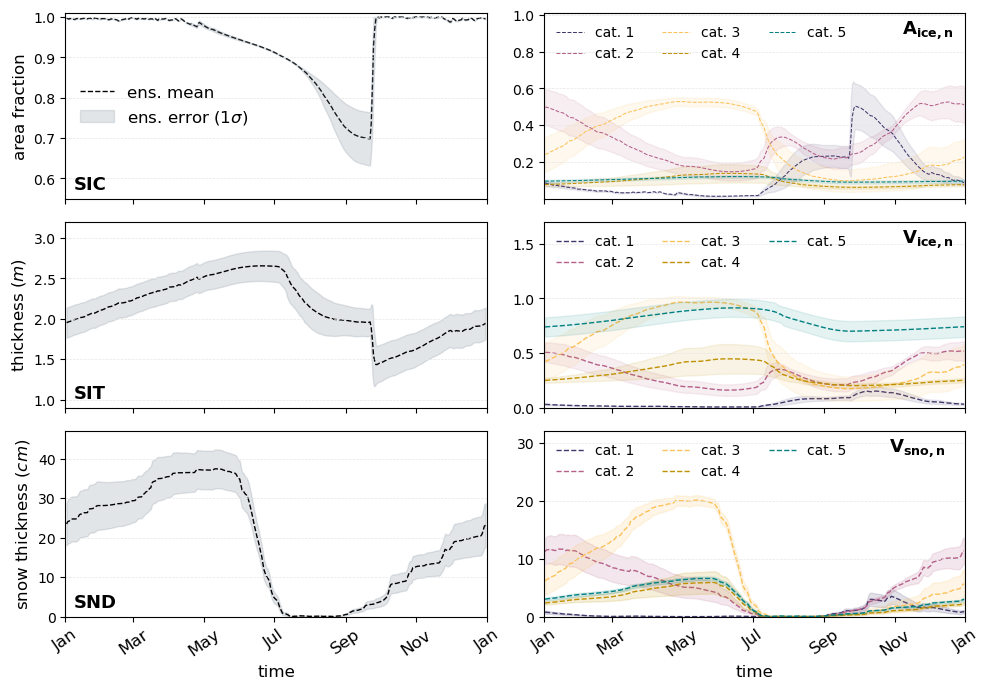

In [21]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10,7))

titles = ['SIT','SIC','SND', r"$\mathbf{A_{ice,n}}$", r"$\mathbf{V_{ice,n}}$", r"$\mathbf{V_{sno,n}}$"]
colors = ['palevioletred', 'teal', 'tan']

# aice_colors = ['#9e0168','#c71585','#d7589c','#e485b4','#efaecd','#f8d7e6']
# vice_colors = ['#036666', '#248277', '#469D89', '#67B99A', '#88D4AB']
# vsno_colors = ['#6D7361', '#989F7E', '#C0C7AB', '#B6AD90', '#AC855E']

gen_colors = ['#42376a','#b46088','#fcc25a','#bf9000', 'teal']

file = "/glade/work/mollyw/Projects/cice-scm-da/data/processed/synthetic_obs/free_test/netcdfs/aggregate_observations.nc"
obs_test = xr.open_dataset(file)
truth = obs_test.sel({"copy": 2})
x = obs_test.time.values[0:1092:3]

axes[0][0].grid(axis='y', color = '0.9', linewidth = 0.5, linestyle = 'dashed', zorder = 0)
axes[1][0].grid(axis='y', color = '0.9', linewidth = 0.5, linestyle = 'dashed', zorder = 0)
axes[2][0].grid(axis='y', color = '0.9', linewidth = 0.5, linestyle = 'dashed', zorder = 0)

axes[0][1].grid(axis='y', color = '0.9', linewidth = 0.5, linestyle = 'dashed', zorder = 0)
axes[1][1].grid(axis='y', color = '0.9', linewidth = 0.5, linestyle = 'dashed', zorder = 0)
axes[2][1].grid(axis='y', color = '0.9', linewidth = 0.5, linestyle = 'dashed', zorder = 0)

axes[0][0].plot(x, fem.aice, c = 'black', label = 'ens. mean',linewidth = 1, linestyle='dashed', zorder = 1)
axes[0][0].fill_between(x, flw.aice, fup.aice, alpha=0.2, color = 'slategrey', label = 'ens. error (1$\sigma$)')

axes[1][0].fill_between(x, flw.hi, fup.hi, alpha=0.2, color = 'slategrey')
axes[1][0].plot(x, fem.hi, c = 'black', linewidth = 1, linestyle = 'dashed', zorder = 1)

axes[2][0].fill_between(x, flw.vsnon.sum(dim='ncat')*100, fup.vsnon.sum(dim='ncat')*100, alpha=0.2, color = 'slategrey')
axes[2][0].plot(x, fem.vsnon.sum(dim='ncat')*100, c = 'black',linewidth = 1, linestyle = 'dashed', zorder = 1)

axes[0][0].set_xticklabels([])
axes[1][0].set_xticklabels([])
axes[2][0].set_xticklabels(labels = ['Jan','Mar','May','Jul','Sep','Nov','Jan'], rotation=35, fontsize=12)

axes[0][0].set_ylim([0.55,1.01])
axes[0][0].set_xlim([365*41+10, 365*42+10])
axes[0][0].set_ylabel('area fraction', fontsize=12)
axes[0][0].legend(frameon=False, loc = 'center left', fontsize=12)

axes[1][0].set_ylim([0.9,3.2])
axes[1][0].set_xlim([365*41+10, 365*42+10])
# axes[1].set_xlabel('time', fontsize=12, fontweight='bold', color='grey')
axes[1][0].set_ylabel('thickness $(m)$', fontsize=12)

axes[2][0].set_ylim([0,47])
axes[2][0].set_xlim([365*41+10, 365*42+10])
axes[2][0].set_xlabel('time',fontsize=12)
axes[2][0].set_ylabel('snow thickness $(cm)$', fontsize=12)

axes[0][0].text(0.02, 0.05, titles[1],
             transform=axes[0][0].transAxes,
             fontsize=13, fontweight='bold')
axes[1][0].text(0.02, 0.05, titles[0],
             transform=axes[1][0].transAxes,
             fontsize=13, fontweight='bold')
axes[2][0].text(0.02, 0.05, titles[2],
             transform=axes[2][0].transAxes,
             fontsize=13, fontweight='bold')

axes[0][1].text(0.85, 0.89, titles[3],
             transform=axes[0][1].transAxes,
             fontsize=13, fontweight='bold')
axes[1][1].text(0.85, 0.89, titles[4],
             transform=axes[1][1].transAxes,
             fontsize=13, fontweight='bold')
axes[2][1].text(0.82, 0.89, titles[5],
             transform=axes[2][1].transAxes,
             fontsize=13, fontweight='bold')

file = "/glade/work/mollyw/Projects/cice-scm-da/data/processed/synthetic_obs/free_test/netcdfs/itd_observations.nc"
obs_test = xr.open_dataset(file)
truth = obs_test.sel({"copy": 2})

for i in range(0,5):
    if i == 0 :
        # style = '-.'
        style = '--'
    elif i == 2:
        # style = ':'
        style = '--'
    elif i == 4:
        style = '--'
    else:
        # style = '-'
        style = '--'
    axes[0][1].fill_between(x, flw.aicen.isel({'ncat':i}), fup.aicen.isel({'ncat':i}), alpha=0.1, color = gen_colors[i])
    axes[0][1].plot(x, fem.aicen.isel({'ncat':i}), c = gen_colors[i], label = 'cat. '+str(i+1), linestyle = style, linewidth = 0.75, zorder = 10)
    axes[0][1].set_xlim([365*41+10, 365*42+10])
    axes[0][1].set_xticklabels([])
    axes[0][1].set_ylim([0.001,1.01])
    axes[0][1].legend(frameon = False, ncols=3, loc= 'upper left')
    
    axes[1][1].fill_between(x, flw.vicen.isel({'ncat':i}), fup.vicen.isel({'ncat':i}), alpha=0.1, color = gen_colors[i])
    axes[1][1].plot(x, fem.vicen.isel({'ncat':i}), c = gen_colors[i], label = 'cat. '+str(i+1), linewidth = 1, linestyle=style, zorder = 1)
    axes[1][1].set_xlim([365*41+10, 365*42+10])
    axes[1][1].set_xticklabels([])
    axes[1][1].set_ylim([0,1.7])
    axes[1][1].legend(frameon = False, ncols=3, loc= 'upper left')
    
    axes[2][1].fill_between(x, flw.vsnon.isel({'ncat':i})*100, fup.vsnon.isel({'ncat':i})*100, alpha=0.15, color = gen_colors[i])
    axes[2][1].plot(x, fem.vsnon.isel({'ncat':i})*100, c = gen_colors[i], label = 'cat. '+str(i+1), linewidth = 1, linestyle=style, zorder = 1)
    axes[2][1].set_xlim([365*41+10, 365*42+10])
    axes[2][1].set_xticklabels(labels = ['Jan','Mar','May','Jul','Sep','Nov','Jan'], rotation=35, fontsize=12)
    axes[2][1].set_xlabel('time',fontsize=12)
    axes[2][1].set_ylim([0,32])
    axes[2][1].legend(frameon = False, ncols=3, loc= 'upper left')

plt.tight_layout()
plt.savefig('figures/ensemble_lineplots.png', dpi=300, bbox_inches='tight')